In [12]:
from powerspectra import Powerspectra
import numpy as np
import matplotlib.pyplot as plt
import camb

plt.rcParams['figure.figsize'] = [10, 5]

In [13]:
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
ps = power.get_weyl_ps(z, ks)

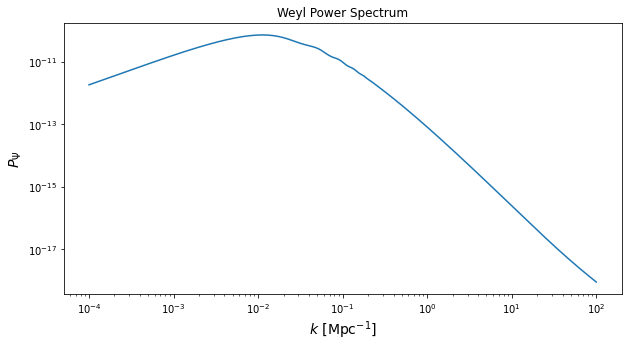

In [14]:
# Weyl Potential
plt.figure()
plt.loglog(ks, ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

In [15]:
ellmax = 10000
Nchi=1000
power.recalculate_weyl(ellmax, Nchi)
ps = power.get_weyl_ps(z, ks)

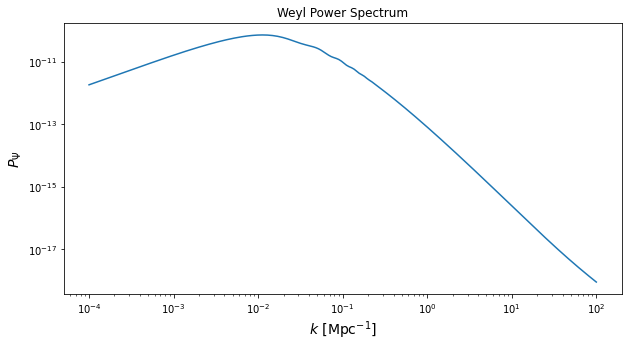

In [16]:
# Weyl Potential
plt.figure()
plt.loglog(ks, ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

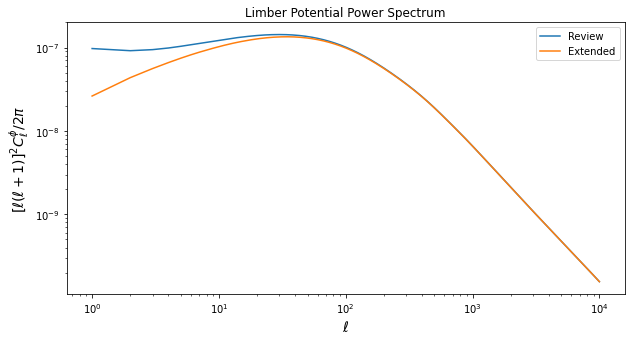

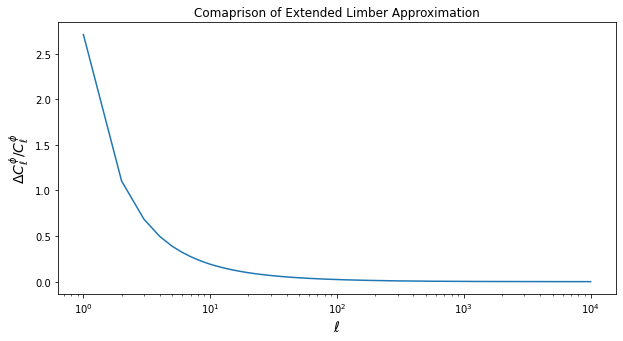

In [17]:
# Limber approximated potentials
ells = np.arange(1, 10000, 1)
Cl_phi = power.get_phi_ps(ells, extended=False)
plt.figure()
plt.loglog(ells, Cl_phi*(ells*(ells + 1))**2/(2*np.pi), label="Review")
#plt.xlim(1e1, 1e4)

ells_ext = ells
Cl_phi_ext = power.get_phi_ps(ells, extended=True)
plt.loglog(ells_ext, Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended")
plt.title("Limber Potential Power Spectrum")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()

Cl_diff = np.abs(Cl_phi_ext - Cl_phi)/Cl_phi_ext
plt.figure()
plt.semilogx(ells_ext, Cl_diff)
plt.title("Comaprison of Extended Limber Approximation")
plt.ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.show()

In [18]:
#Compare with CAMB's calculation:
#note that to get CAMB's internal calculation accurate at the 1% level at L~2000, 
#need lens_potential_accuracy=2. Increase to 4 for accurate match to the Limber calculation here
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.set_for_lmax(ellmax,lens_potential_accuracy=10)
results = camb.get_results(pars)
Cl_camb=results.get_lens_potential_cls(ellmax)
ells_camb = np.where(Cl_camb[:, 0] > 0)[0]
Cl_camb = Cl_camb[ells_camb, 0]

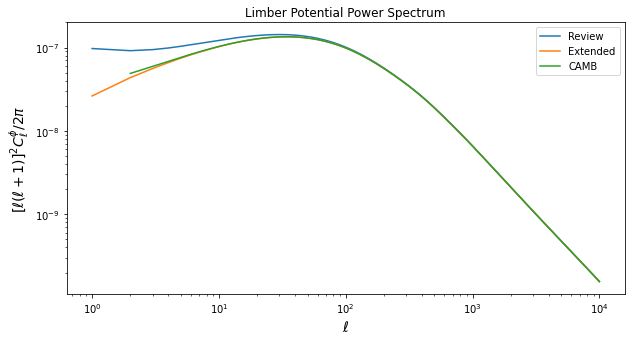

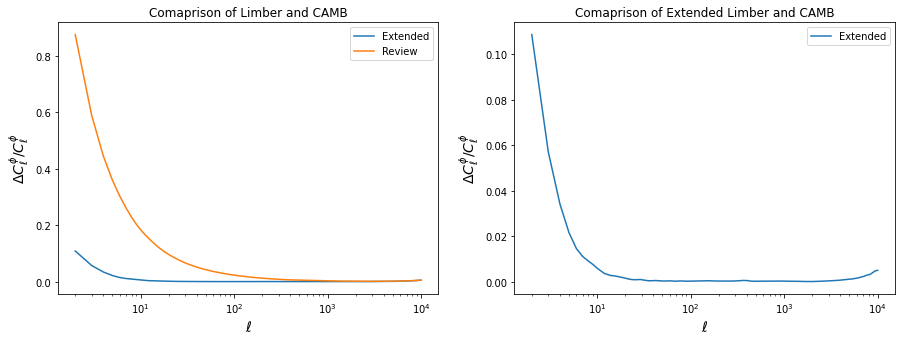

In [19]:
plt.figure()
plt.loglog(ells, Cl_phi*(ells*(ells + 1))**2/(2*np.pi), label="Review")
plt.loglog(ells_ext, Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended")
plt.loglog(ells_camb, Cl_camb, label="CAMB")
plt.title("Limber Potential Power Spectrum")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()
plt.show()

Cl_diff_ext = np.abs(Cl_phi_ext[1:]*(ells_ext[1:]*(ells_ext[1:] + 1))**2/(2*np.pi) - Cl_camb[:-1])/Cl_camb[:-1]
Cl_diff = np.abs(Cl_phi[1:]*(ells[1:]*(ells[1:] + 1))**2/(2*np.pi) - Cl_camb[:-1])/Cl_camb[:-1]
fig, ax = plt.subplots(1,2, figsize=[15, 5])
ax[0].semilogx(ells_ext[1:], Cl_diff_ext, label="Extended")
ax[0].semilogx(ells[1:], Cl_diff, label="Review")
ax[0].set_title("Comaprison of Limber and CAMB")
ax[0].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[0].set_xlabel("$\ell$", fontsize=14)
ax[0].legend()
ax[1].semilogx(ells_ext[1:], Cl_diff_ext, label="Extended")
ax[1].set_title("Comaprison of Extended Limber and CAMB")
ax[1].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[1].set_xlabel("$\ell$", fontsize=14)
ax[1].legend()
plt.show()

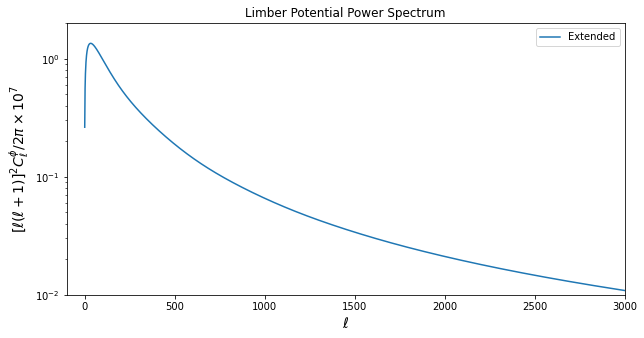

In [20]:
plt.figure()
plt.semilogy(ells_ext, 1e7*Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended")
plt.title("Limber Potential Power Spectrum")
plt.ylabel(r"$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi \times 10^7$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(-100, 3000)
plt.ylim(1e-2, 2e0)
plt.legend()
plt.show()

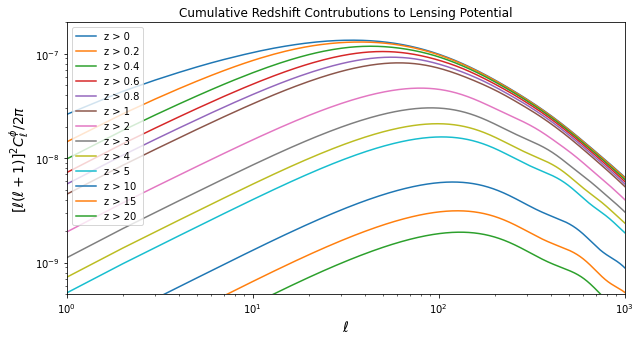

In [21]:
for z in [0, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 10, 15, 20]:
    Cl = power.get_phi_ps(ells, zmin=z)

    plt.loglog(ells, Cl*(ells*(ells + 1))**2/(2*np.pi), label=f"z > {z}")
    plt.legend()
    plt.title("Cumulative Redshift Contrubutions to Lensing Potential")
    plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
    plt.xlabel("$\ell$", fontsize=14)
    plt.xlim(1, 1e3)
    plt.ylim(5e-10, 2e-7)
plt.show()

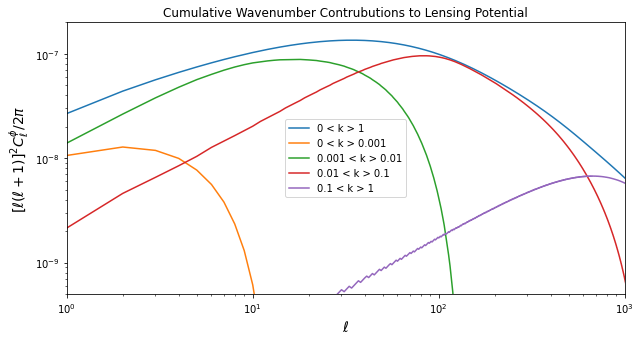

In [22]:
for kmin, kmax in [(0, 1), (0, 1e-3), (1e-3, 1e-2), (1e-2, 0.1), (0.1, 1)]:
    Cl = power.get_phi_ps(ells, Nchi=1000, kmin=kmin, kmax=kmax)

    plt.loglog(ells, Cl*(ells*(ells + 1))**2/(2*np.pi), label=f"{kmin} < k > {kmax}")
    plt.legend()
    plt.title("Cumulative Wavenumber Contrubutions to Lensing Potential")
    plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
    plt.xlabel("$\ell$", fontsize=14)
    plt.xlim(1, 1e3)
    plt.ylim(5e-10, 2e-7)
plt.show()